## Objective

The goal of this analysis is to identify individuals who do not currently have diabetes but are at high risk of developing the condition in the future. By leveraging a **Logistic Regression** model, we aim to predict the likelihood of diabetes onset based on key health indicators.

## Approach

1. **Feature Selection**: Using insights from previous classification models, we identify the most important features for predicting diabetes. These features include factors such as **BMI**, **age**, **blood pressure**, and **cholesterol levels**.
   
2. **Model Training**: A Logistic Regression model is trained on the entire dataset, focusing on these critical features. The model learns the patterns that differentiate individuals who are diabetic from those who are not.

3. **Risk Prediction**: After training the model, we apply it to predict the probability of diabetes for non-diabetic individuals. The resulting predictions help identify those who are at high risk but may not yet show symptoms.

## Impact

This analysis provides a valuable tool for early identification of individuals at risk of developing diabetes. By identifying these high-risk individuals, healthcare providers can take preventative actions, such as recommending lifestyle changes or conducting further tests, to help protect these individuals from future health complications.

In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [2]:
pd.set_option('display.max_columns', None)
diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
# keep values smaller than the 75th percentile of the BMI column
diabetes = diabetes[diabetes['BMI'] < diabetes['BMI'].quantile(0.99)]

We take the most important features that help us predict diabetes from the classification model of the first data mining technique

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Select the most important features
most_important_features = ['BMI', 'GenHlth', 'Age', 'HighBP', 'Income', 'PhysHlth', 
                           'HighChol', 'CholCheck', 'HeartDiseaseorAttack']

non_diabetics = diabetes[diabetes['Diabetes_012'] == 0]  # Filter for non-diabetics

X_non_diabetics = non_diabetics[most_important_features]  # Use the most important features derived from classification
y_non_diabetics = non_diabetics['Diabetes_012']   # Target variable

# Now split the data into training and testing sets for the model (using the entire dataset)
X = diabetes[most_important_features]  # Feature matrix for all individuals
y = diabetes['Diabetes_012']           # Target variable for all individuals

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
continuous_features = ['BMI']

# Initialize the StandardScaler for BMI
scaler = StandardScaler()

# Fit the scaler on the training set's BMI and transform both train and test sets
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

X_non_diabetics[continuous_features] = scaler.transform(X_non_diabetics[continuous_features])

# Predict the probability of becoming diabetic for non-diabetics
non_diabetic_probabilities = logreg.predict_proba(X_non_diabetics)[:, 2]

# Add the probabilities back to the non-diabetics DataFrame for reference
non_diabetics['Diabetes_Probability'] = non_diabetic_probabilities

Model Accuracy: 0.8495


/var/folders/tw/xhv51_3109b07x000pvllsdh0000gn/T/ipykernel_84665/1832330228.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_non_diabetics[continuous_features] = scaler.transform(X_non_diabetics[continuous_features])
/var/folders/tw/xhv51_3109b07x000pvllsdh0000gn/T/ipykernel_84665/1832330228.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_diabetics['Diabetes_Probability'] = non_diabetic_probabilities


In [5]:
non_diabetics['Diabetes_Probability'].min(), non_diabetics['Diabetes_Probability'].max()

(0.0007469408388664166, 0.896535992753652)

In [26]:
high_risk = non_diabetics[non_diabetics['Diabetes_Probability'] > 0.50]

In [27]:
high_risk

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_Probability
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.703258
21,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,15.0,30.0,1.0,0.0,13.0,2.0,3.0,0.748606
65,0.0,1.0,1.0,1.0,38.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,10.0,5.0,1.0,1.0,11.0,5.0,6.0,0.660134
77,0.0,1.0,1.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,10.0,1.0,0.0,12.0,6.0,2.0,0.534143
109,0.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.0,15.0,1.0,0.0,7.0,5.0,3.0,0.512872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253447,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,21.0,0.0,0.0,11.0,2.0,1.0,0.621332
253452,0.0,1.0,1.0,1.0,33.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,0.0,11.0,6.0,2.0,0.571846
253486,0.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,30.0,4.0,1.0,0.0,9.0,5.0,1.0,0.537700
253557,0.0,1.0,1.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,10.0,20.0,1.0,0.0,6.0,4.0,1.0,0.549790


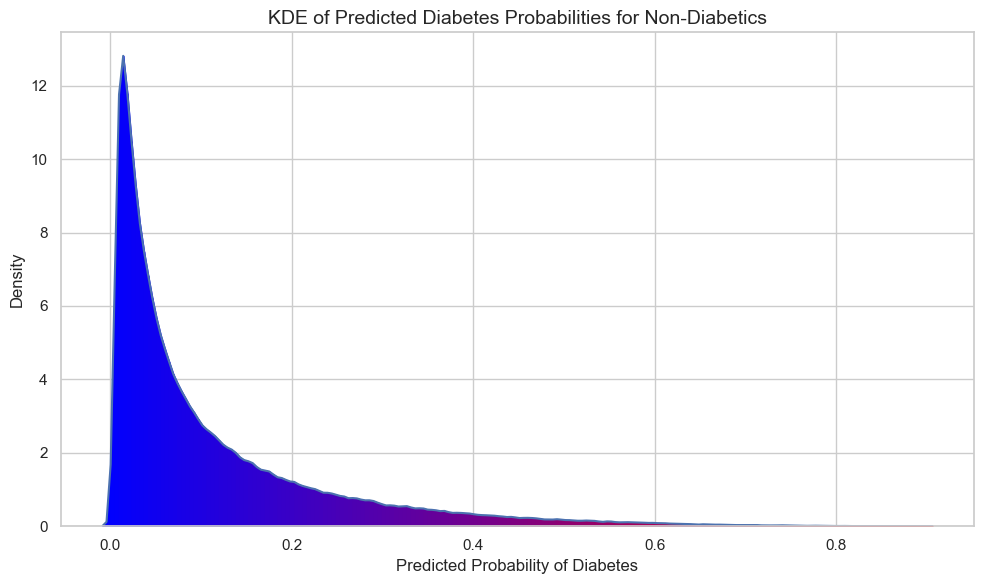

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Assuming `non_diabetic_probabilities` is your array with the predicted probabilities for non-diabetics

# Set the style for the plot
sns.set(style="whitegrid")

# Create a custom colormap with higher contrast (using red to blue with a sharp gradient)
cmap = LinearSegmentedColormap.from_list("HighContrastBlueRed", ["blue", "red"], N=512)

# Create the figure
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Calculate KDE values using seaborn's kdeplot method
kde = sns.kdeplot(non_diabetic_probabilities, bw_adjust=0.3)  # Further reduce bandwidth for sharper contrast
kde_values = kde.get_lines()[0].get_data()[1]
x_values = kde.get_lines()[0].get_data()[0]

# Normalize x-values to [0, 1] range for the colormap
normalized_x = (x_values - min(x_values)) / (max(x_values) - min(x_values))

# Plot the area under the curve with the gradient color from blue to red with higher contrast
for i in range(len(x_values) - 1):
    plt.fill_between(x_values[i:i+2], 0, kde_values[i:i+2], 
                     color=cmap(normalized_x[i]), alpha=1.0)  # Increased alpha for more saturation

# Adding labels and title
plt.xlabel('Predicted Probability of Diabetes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('KDE of Predicted Diabetes Probabilities for Non-Diabetics', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()